In [5]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

c:\Users\giada\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is ePCA_Xlained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Eigenvalues: [2.17378179e+01 1.14917213e-15 2.60698504e+00] 

Eigenvectors: [[-0.08896533 -0.81649658  0.57045465]
 [-0.60969608 -0.40824829 -0.67941447]
 [-0.78762673  0.40824829  0.46149482]] 

********************************

>>USING SVD:

Eigenvalues:
 [2.17378179e+01 1.14917213e-15 2.60698504e+00] 
 [2.17485967e+01 2.60698817e+00 1.51877706e-30]

Eigenvectors:
 [[-0.08896533 -0.81649658  0.57045465]
 [-0.60969608 -0.40824829 -0.67941447]
 [-0.78762673  0.40824829  0.46149482]] 
 [[-0.0889708   0.57045379 -0.81649658]
 [-0.60968955 -0.67942033 -0.40824829]
 [-0.78763116  0.46148726  0.40824829]] 

********************************

Percent of variability, main component: 74.28%
Percent of variability, two features: 1.00%


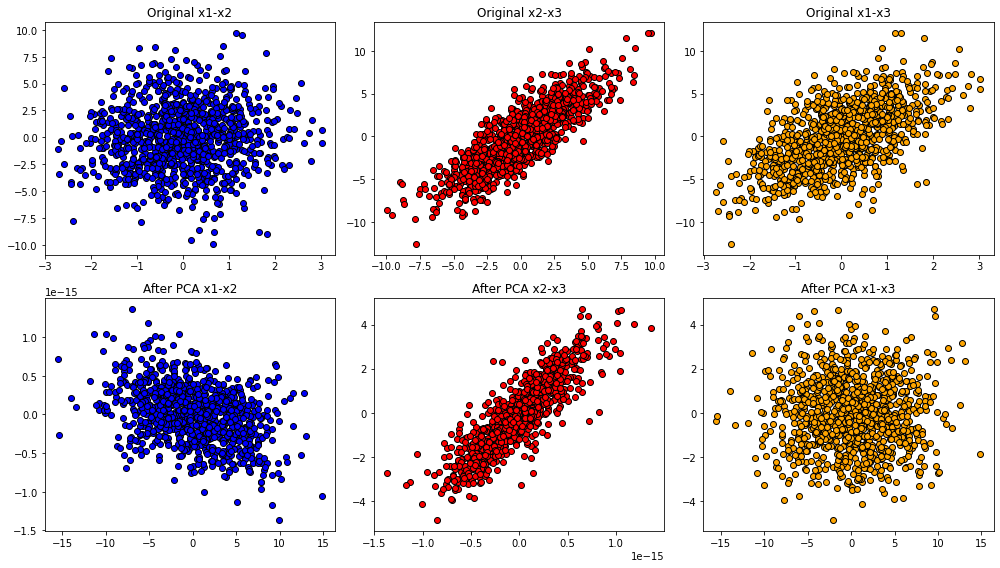

In [9]:
# dataset
N, mu, mu2, sigma, sigma2 = 1000, 0, 0, 1, 3
x1 = np.random.normal(loc=mu, scale=sigma, size=N)
x2 = np.random.normal(loc=mu2, scale=sigma2, size=N)
x3 = 2 * x1 + x2
X = np.array([x1, x2, x3])

# Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
C = np.cov(X)
l, V = np.linalg.eig(C)
print("Eigenvalues:", l, "\n")
print("Eigenvectors:", V, "\n\n********************************\n")

# using SVD
U, S, Vt = np.linalg.svd(X)
svd = S**2 / (N - 1)
print(">>USING SVD:\n\nEigenvalues:\n", l, "\n", svd)
print("\nEigenvectors:\n", V, "\n", U, "\n\n********************************\n")

print("Percent of variability, main component: %.2f%%" % ((S[0] / S.sum()) * 100))
print("Percent of variability, two features: %.2f%%" % ((S[0] + S[1]) / S.sum()))

# redefine data according to the PCA
PCA_X = np.dot(V.T, X)

#Plot original data and PCA
fig, ax = plt.subplots(2, 3, figsize=(14, 8))

ax[0, 0].scatter(X[0], X[1], c='blue', edgecolors="black")
ax[0, 0].set_title('Original x1-x2')
ax[0, 1].scatter(X[1], X[2], c='red', edgecolors="black")
ax[0, 1].set_title('Original x2-x3')
ax[0, 2].scatter(X[0], X[2], c='orange', edgecolors="black")
ax[0, 2].set_title('Original x1-x3')

ax[1, 0].scatter(PCA_X[0], PCA_X[1], c='blue', edgecolors="black")
ax[1, 0].set_title('After PCA x1-x2')
ax[1, 1].scatter(PCA_X[1], PCA_X[2], c='red', edgecolors="black")
ax[1, 1].set_title('After PCA x2-x3')
ax[1, 2].scatter(PCA_X[0], PCA_X[2], c='orange', edgecolors="black")
ax[1, 2].set_title('After PCA x1-x3')

plt.tight_layout()
plt.show()


2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [3]:
noise = X + np.sum(np.random.normal(0, scale=1 / 50, size=(3, N, 10)), axis=2)

# Reducind dimension using PCA
C2 = np.cov(noise)
l2, V2 = np.linalg.eig(C2)
new_l = np.real_if_close(l2)

print("Eigenvalues:\n", new_l)
print("Eigenvectors:\n", V2, "\n\n********************************\n")

print("Percent of variability, main component: %.2f%%" % ((l2[0] / np.sum(l2))*100))
print("Percent of variability, two features: %.2f%%" % ((l2[0] + l2[1]) * 100 / np.sum(l2)))



Eigenvalues:
 [2.11451012e+01 4.04648624e-03 2.68490118e+00]
Eigenvectors:
 [[-0.08298183 -0.81673484  0.57101507]
 [-0.61634786 -0.40819434 -0.67341867]
 [-0.78308961  0.40782543  0.46952006]] 

********************************

Percent of variability, main component: 88.72%
Percent of variability, two features: 88.74%


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [4]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 